# Superstore Sales Performance Analysis

## Step 1: Import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the dataset

In [4]:
data = pd.read_csv("Superstore Sales Performance Raw Data.csv")
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1.0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.00,41.91
1,2.0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3.0,0.00,219.58
2,3.0,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,0.00,6.87
3,4.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5.0,0.45,-383.03
4,5.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2.0,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990.0,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3.0,0.20,4.10
9990,9991.0,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,0.00,15.63
9991,9992.0,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2.0,0.20,19.39
9992,9993.0,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,0.00,13.32


## Step 3: Basic checks and overview

In [129]:
print("\nFirst 5 rows of the dataset:")
print(data.head())

print("\nLast 5 rows of the dataset:")
data.tail()

print("\nDataset Info:")
data.info()

print("\nSummary statistics:")
print(data.describe())

print("\nChecking for missing values:")
print(data.isnull().sum())

print("\nChecking for duplicate rows:")
print(data.duplicated().sum())


First 5 rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0     1.0  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1     2.0  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2     3.0  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3     4.0  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4     5.0  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Ca

## Step 4: Data Cleaning

In [132]:
# No missing values, so nothing to fill. Let’s drop duplicates if any.
data.drop_duplicates(inplace=True)

# Convert 'Order Date' and 'Ship Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data.dtypes

Row ID                  float64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                float64
Discount                float64
Profit                  float64
dtype: object

In [134]:
data.count()

Row ID           9994
Order ID         9994
Order Date       9994
Ship Date        9994
Ship Mode        9994
Customer ID      9994
Customer Name    9994
Segment          9994
Country          9994
City             9994
State            9994
Postal Code      9994
Region           9994
Product ID       9994
Category         9994
Sub-Category     9994
Product Name     9994
Sales            9994
Quantity         9994
Discount         9994
Profit           9994
dtype: int64

In [136]:
data.sample(8)   # Showing Random Rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1633,1634.0,CA-2016-106530,2016-05-08,2016-05-08,Same Day,CL-12565,Clay Ludtke,Consumer,United States,Cleveland,...,44105,East,OFF-ST-10000649,Office Supplies,Storage,Hanging Personal Folder File,25.12,2.0,0.2,1.57
9620,9621.0,CA-2014-115133,2014-09-26,2014-09-30,Standard Class,DA-13450,Dianna Arnett,Home Office,United States,Lancaster,...,43130,East,OFF-AP-10001634,Office Supplies,Appliances,Hoover Commercial Lightweight Upright Vacuum,16.70,6.0,0.2,1.25
8168,8169.0,CA-2017-107174,2017-11-06,2017-11-13,Standard Class,AB-10060,Adam Bellavance,Home Office,United States,Seattle,...,98105,West,FUR-TA-10004575,Furniture,Tables,Hon 5100 Series Wood Tables,2036.86,7.0,0.0,366.63
1954,1955.0,CA-2017-157987,2017-09-02,2017-09-06,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,...,10009,East,OFF-AR-10004582,Office Supplies,Art,BIC Brite Liner Grip Highlighters,4.92,3.0,0.0,2.21
5185,5186.0,CA-2015-134719,2015-10-10,2015-10-15,Standard Class,JD-15790,John Dryer,Consumer,United States,Jacksonville,...,32216,South,OFF-ST-10004459,Office Supplies,Storage,Tennsco Single-Tier Lockers,1801.63,6.0,0.2,-337.81
8995,8996.0,CA-2014-109043,2014-08-15,2014-08-17,First Class,CS-12355,Christine Sundaresam,Consumer,United States,Hollywood,...,33021,South,OFF-AP-10004708,Office Supplies,Appliances,Fellowes Superior 10 Outlet Split Surge Protector,152.24,5.0,0.2,17.13
575,576.0,CA-2015-149713,2015-09-18,2015-09-22,Second Class,TG-21640,Trudy Glocke,Consumer,United States,Long Beach,...,90805,West,OFF-PA-10004530,Office Supplies,Paper,Personal Creations Ink Jet Cards and Labels,160.72,14.0,0.0,78.75
1507,1508.0,CA-2016-134208,2016-09-17,2016-09-23,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Columbus,...,31907,South,TEC-MA-10004458,Technology,Machines,Lexmark X 9575 Professional All-in-One Color P...,396.00,4.0,0.0,190.08


In [138]:
data.shape # (Rows,Columns)

(9994, 21)

In [140]:
data.columns  # list of columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [142]:
data.dtypes    # data types of each column

Row ID                  float64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                float64
Discount                float64
Profit                  float64
dtype: object

In [144]:
data.isnull().sum()       # Count of null per column

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [146]:
data.duplicated().sum()  # number of duplicate rows

0

In [148]:
data.nunique()  # unique values in each column 

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5457
Quantity           14
Discount           12
Profit           5157
dtype: int64

In [150]:
data.describe()  # summary of numeric column 

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858022,3.789574,0.156203,28.656973
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.440000,1.000000,0.000000,-6599.980000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.730000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.665000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.360000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.980000
std,2885.163629,NaN,NaN,32063.693350,623.245131,2.225110,0.206452,234.260203


In [152]:
## Check for blank strings 

(data == ' ').sum()  # count  of the empty string entries per column

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Step 5: Exploratory Data Analysis (EDA)

In [155]:
# Overall sales and profit
print("\nTotal Sales:", data['Sales'].sum())
print("Total Profit:", data['Profit'].sum())


Total Sales: 2297201.07
Total Profit: 286397.79000000004


In [157]:
# Sales by Category
category_sales = data.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
print("\nSales & Profit by Category:")
print(category_sales)


Sales & Profit by Category:
          Category      Sales     Profit
0        Furniture  741999.98   18451.25
1  Office Supplies  719046.99  122490.88
2       Technology  836154.10  145455.66


## Step 6: Visualizations

## 1] Univariate Analysis (One Column At a Time )

### Numerical Columns

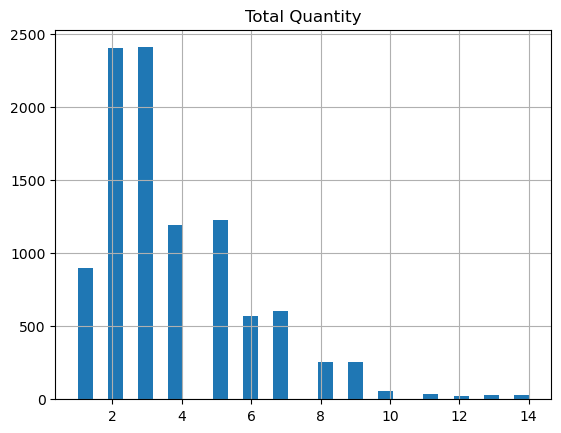

In [161]:
data['Quantity'].describe()  # summary of the column 
plt.title('Total Quantity')
# Create A Histogram
data['Quantity'].hist(bins=30)
plt.show()

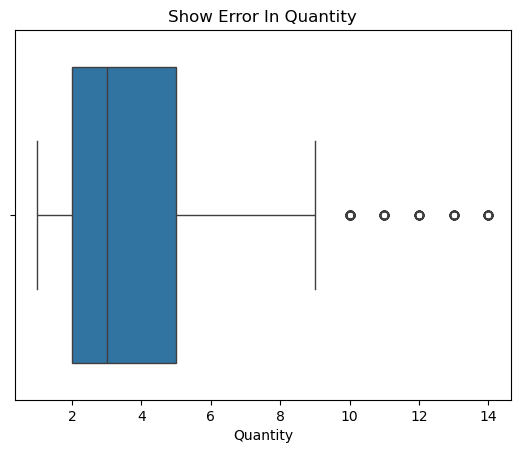

In [163]:
plt.title('Show Error In Quantity')
sns.boxplot(x=data['Quantity'])
plt.show()

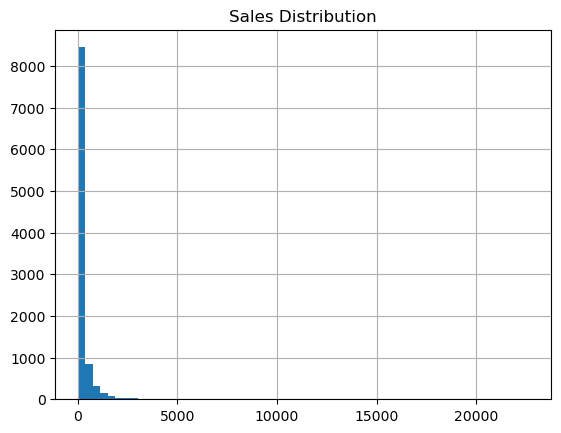

In [165]:
# Sales Column 
data['Sales'].describe()
data['Sales'].hist(bins=60)
plt.title('Sales Distribution')
plt.show()

## Explore The Data 

Total Sales :
Top Selling Products :
Region Wise Sales :


<Axes: xlabel='Month'>

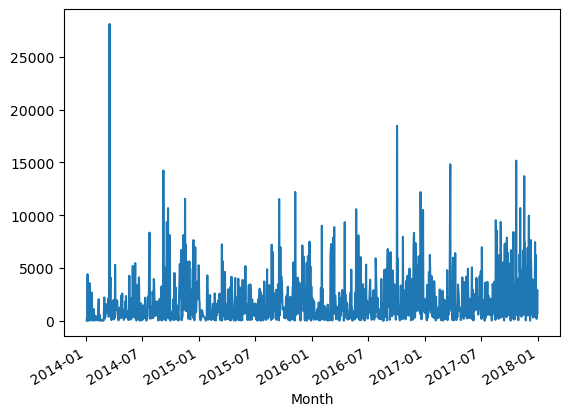

In [168]:
## 1] What is the total sales?

print('Total Sales :')
data['Sales'].sum()

## 2] Which product sold the most?

print('Top Selling Products :')
data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

## 3] Which region had the highest profit?

print('Region Wise Sales :')
data.groupby('Region')['Sales'].sum()

## 4] Which month had the most sales?

data['Month'] = data['Order Date']
data.groupby('Month')['Sales'].sum().plot(kind='line') # we plot barchart , line , pichart - plot(kind='pie', autopct='%1.1f%%',startangle=90)

## Insigts from data

### 1] Total Sales By Category

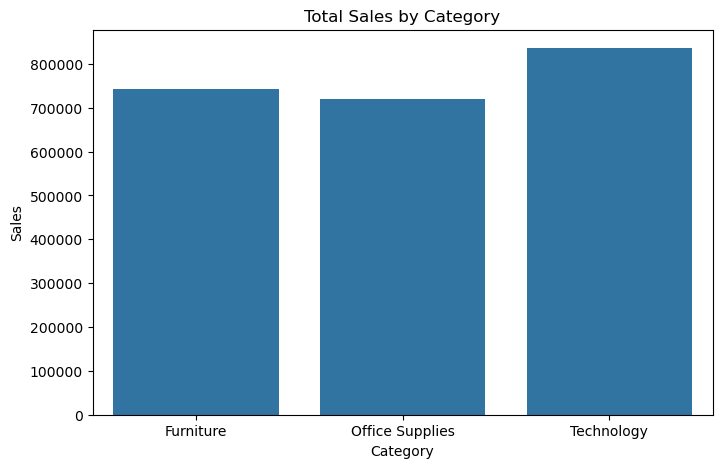

In [172]:
plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='Category', y='Sales')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.show()

### 2] Total Profit By Category

C:\Users\janav\AppData\Local\Temp\ipykernel_7336\978794778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='Profit', palette='coolwarm')


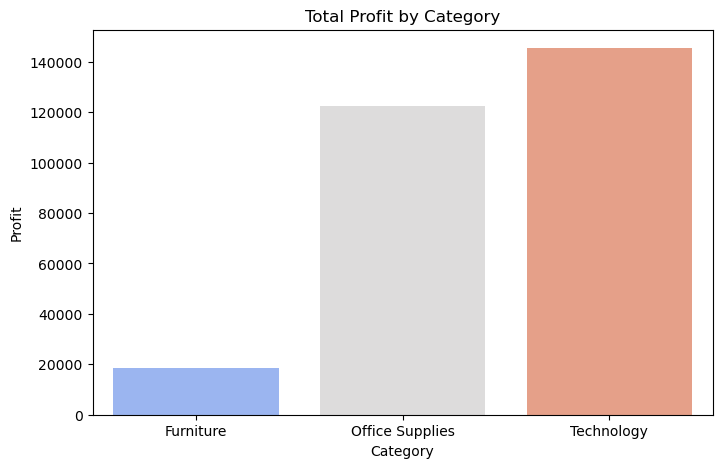

In [175]:
plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='Category', y='Profit', palette='coolwarm')
plt.title('Total Profit by Category')
plt.ylabel('Profit')
plt.show()

### 3] Sales by Region

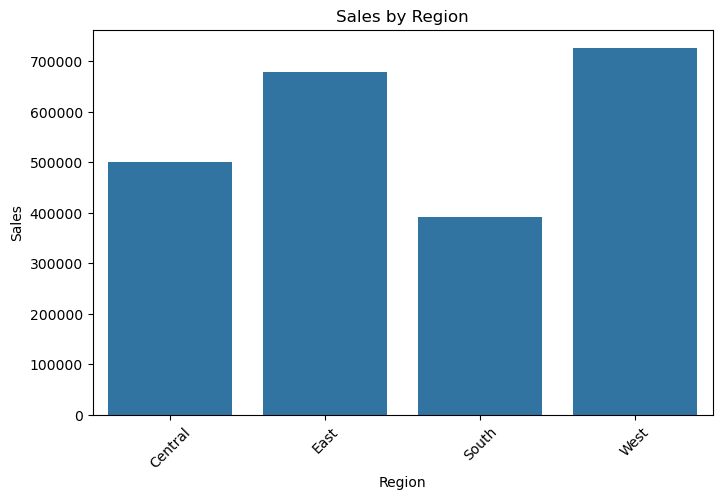

In [178]:
region_sales = data.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=region_sales, x='Region', y='Sales')
plt.title('Sales by Region')
plt.xticks(rotation=45)
plt.show()

### 2] Monthly Sales 

In [182]:
data['Order ID'] = data['Order Date'].astype(str)
data['Month'] = data['Order ID'].str.extract(r'(\d{4})')
data['Month'] = data['Month'].astype(int)
data['Month'].describe()

count    9994.000000
mean     2015.722233
std         1.123555
min      2014.000000
25%      2015.000000
50%      2016.000000
75%      2017.000000
max      2017.000000
Name: Month, dtype: float64

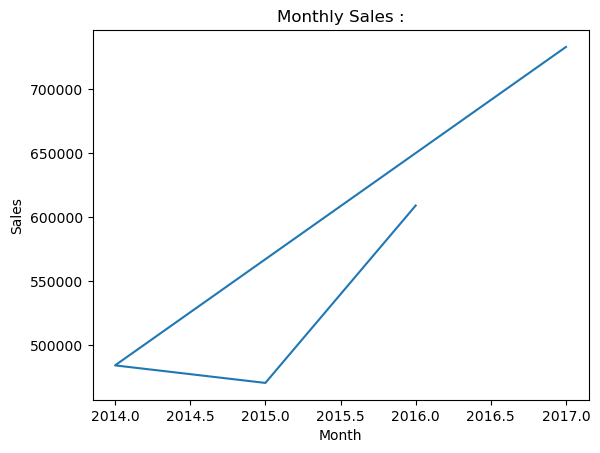

In [184]:
## 2] Monthly Sales 

months = data['Month'].unique()
sale = [data[data['Month']== d]['Sales'].sum() for d in months]

plt.plot(months,sale)
plt.title('Monthly Sales :')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [186]:
## Create Year Column:

data['Order ID'] = data['Order Date'].astype(str)
data['Year'] = data['Order ID'].str.extract(r'(\d{4})')  # extract 4 digit year 
data['Year'] = data['Year'].astype(int)
#years = sorted(data['Year'].unique())
data['Year'].describe()

count    9994.000000
mean     2015.722233
std         1.123555
min      2014.000000
25%      2015.000000
50%      2016.000000
75%      2017.000000
max      2017.000000
Name: Year, dtype: float64

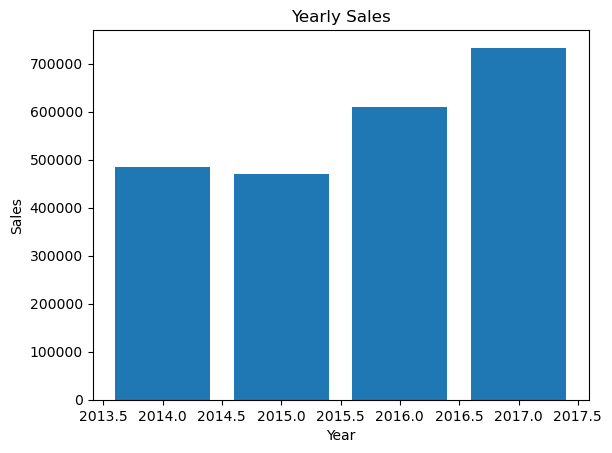

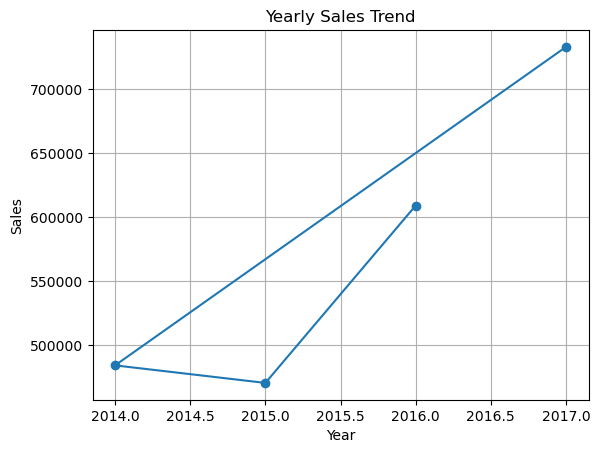

In [188]:
## Year Wise Sales:
years = data['Year'].unique()
sales = [data[data['Year'] == y]['Sales'].sum() for y in years]

plt.bar(years, sales)
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Step 4: Plot line graph
plt.plot(years, sales, marker='o')  # marker='o' adds dots to each year
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

### Feature Engineering

#### In this phase you will create new column that can be useful for analysis

#### Example :

#### If you have a date column extract Month , Day , Weekday

In [191]:
# Extracting Month,Day,Weekday From order date 
data['Order Date'] = pd.to_datetime(data['Order Date'],format='%Y%m%d')  # Ensure it's a datetime type

## Extract Useful Features

data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day
data['Weekday'] = data['Order Date'].dt.weekday   # Monday = 0 , Sunday = 6

data['Month'].describe()
data['Day'].describe()
data['Weekday'].describe()


count    9994.000000
mean        3.206324
std         2.122925
min         0.000000
25%         1.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Weekday, dtype: float64

In [193]:
## Profit Margin and Revenue
data['Revenue'] = data['Sales']*data["Quantity"] # Example : Revenue = Sales * Quantity
data['Profit Margin'] = data['Profit'] / data['Sales'] # Profit Margin

data['Revenue'].describe()

count      9994.000000
mean       1149.496118
std        3898.666067
min           0.440000
25%          48.695000
50%         183.680000
75%         763.200000
max      135830.880000
Name: Revenue, dtype: float64

In [195]:
## Data Preprocessing

### Here We handle missing values,duplicates,and scaling if needed

# Handle Missing Values:

print(data.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Month            0
Year             0
Day              0
Weekday          0
Revenue          0
Profit Margin    0
dtype: int64


In [197]:
# Fill or Drop missing values:

# data.fillna(data.mean())   # Fill missinf values with mean for numerical column

# or drop rows with missing values

# data.dropna()

## But there is no any null values there so no need to remove or replace ##

## Step 7: Correlation Heatmap

Correlation helps you understand how features relate to each other, use a heatmap to visualize correlations.


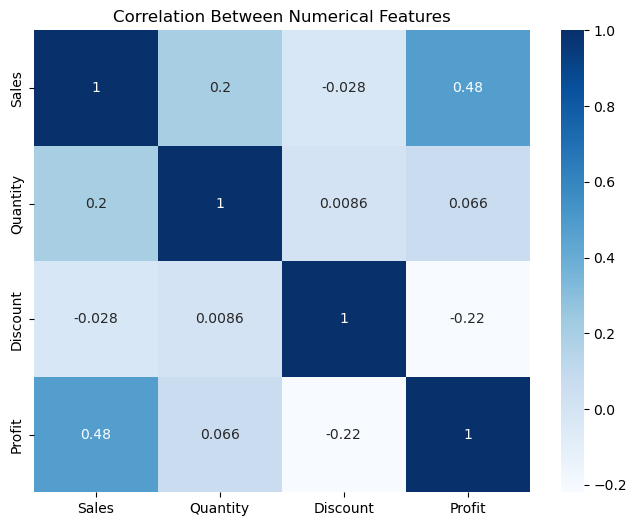

In [200]:
plt.figure(figsize=(8,6))   # plot correlation matrix
sns.heatmap(data[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Numerical Features')
plt.show()

In [202]:
data.to_csv("Cleaned_Superstore_Data.csv", index=False)

## Region-wise Profit Bar Chart

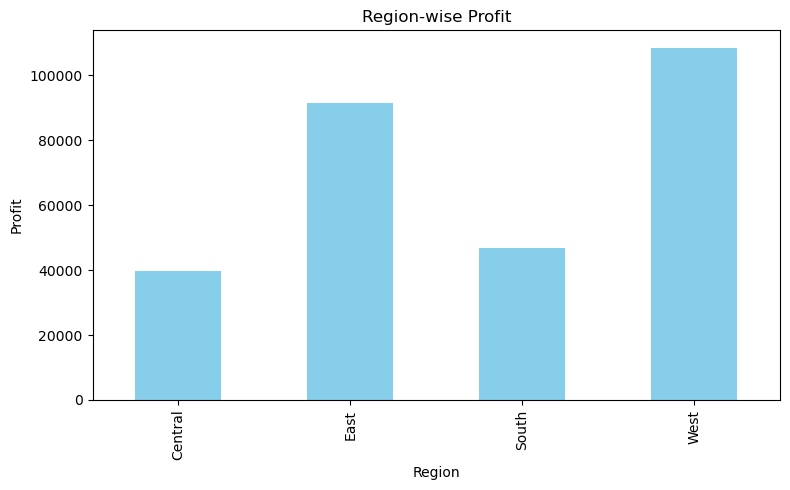

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))  # matrix size
data.groupby('Region')['Profit'].sum().plot(kind='bar', color='skyblue')
plt.title("Region-wise Profit")
plt.ylabel("Profit")
plt.tight_layout()
plt.savefig("region_wise_profit.png")
plt.show()

## Sub-Category Sales vs Profit (Bar or Scatter)

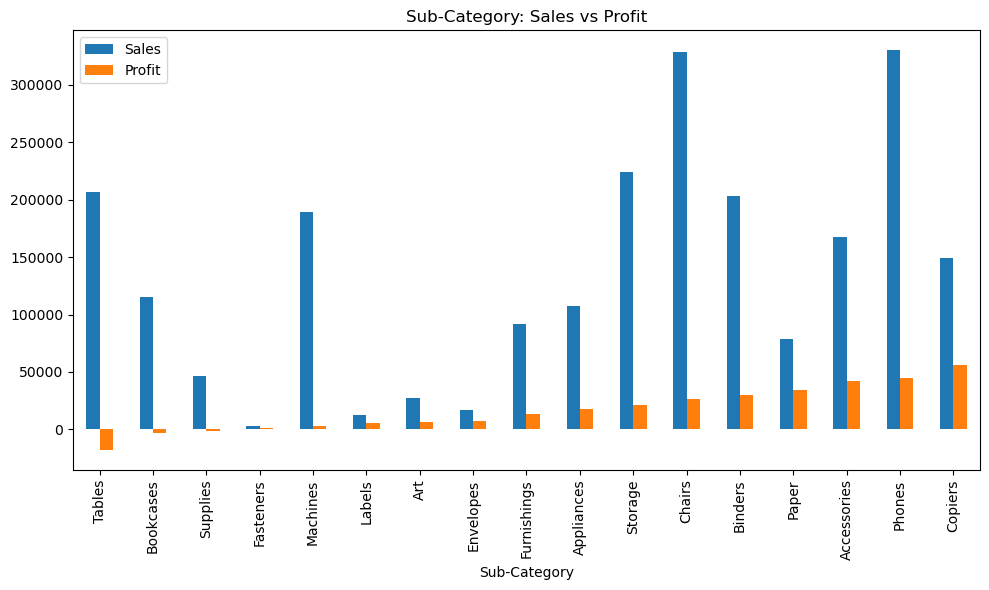

In [12]:
subcat = data.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Profit')
subcat.plot(kind='bar', figsize=(10,6))
plt.title("Sub-Category: Sales vs Profit")
plt.tight_layout()
plt.savefig("subcategory_sales_profit.png")
plt.show()

## Discount vs Profit (Scatter Plot)

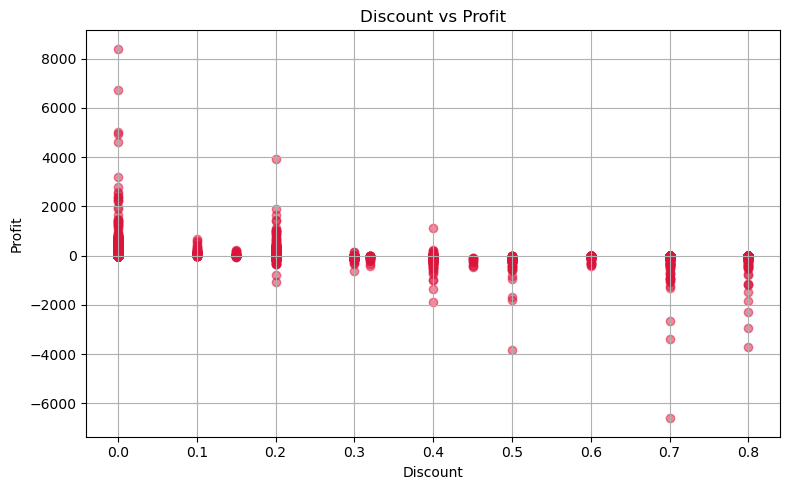

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(data['Discount'], data['Profit'], alpha=0.5, color='crimson')
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.savefig("discount_vs_profit.png")
plt.show()

## Segment-wise Sales Pie Chart

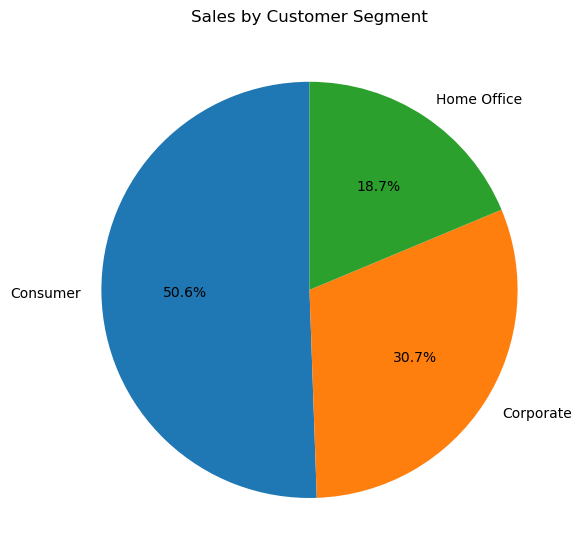

In [18]:
segment_sales = data.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(6,6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=90)
plt.title("Sales by Customer Segment")
plt.tight_layout()
plt.savefig("segment_sales_pie.png")
plt.show()

## Top 10 Cities by Sales

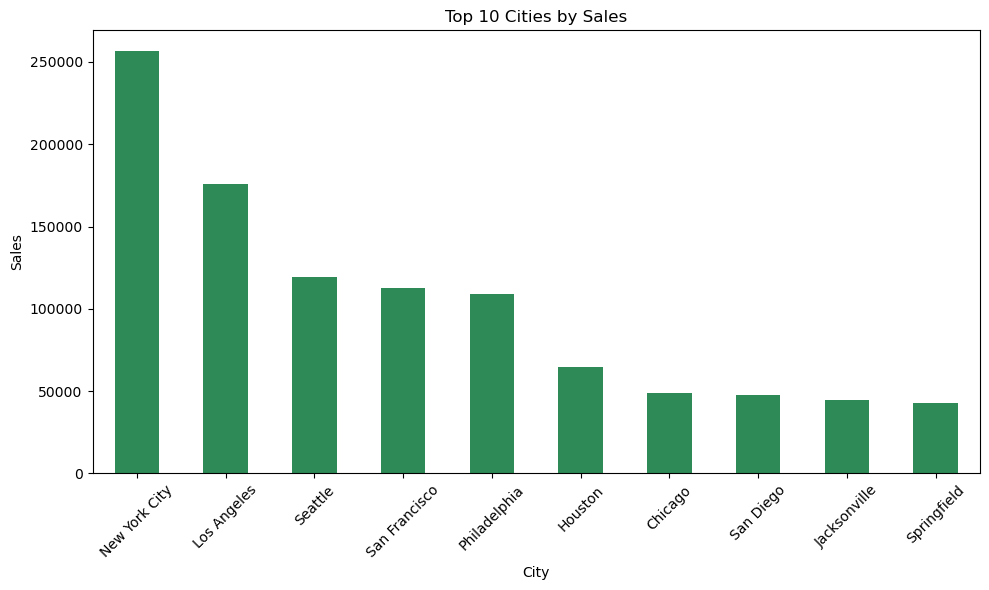

In [21]:
top_cities = data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_cities.plot(kind='bar', color='seagreen')
plt.title("Top 10 Cities by Sales")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top10_cities_sales.png")
plt.show()

# ___________________   Analysis Complete !!!!      _____________________